In [19]:
from tau_fxn import GetResponseTime, ResponseTimeCorrection
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter

In [2]:
# Load sample dunk
data = pd.read_csv('data/test_dunk.csv', index_col = 0)

In [11]:
def GetDunkData(data, sensor, asset, dtype = 'O2SAT'):
    # sensor: sensor type
    # asset: asset number 0 or 1
    
    # Asset dictionary
    assets = {'AA4330|WTW': ['AA3827','AA3312'],
              'AA4330': ['AA3412','AA3413'],
              'RBR|SLOW': ['rbr210624', 'rbr210619'],
              'PYRO-PICO': ['PYRO1','PYRO2']}
    sname = assets[sensor][asset]
    
    time = data.loc[:,'UNIXTIME'].values
    temp = data.loc[:,sname+'_T'].values
    values = data.loc[:,sname+'_O2SAT'].values

    # Remove NaN's
    inds = np.where(np.isnan(values)==False)[0]
    time = time[inds]; temp = temp[inds]; values = values[inds]

    # Zero times and convert to seconds
    time = (time-time[0])/1000
    
    return time, temp, values    

In [12]:
optode = 'AA4330'

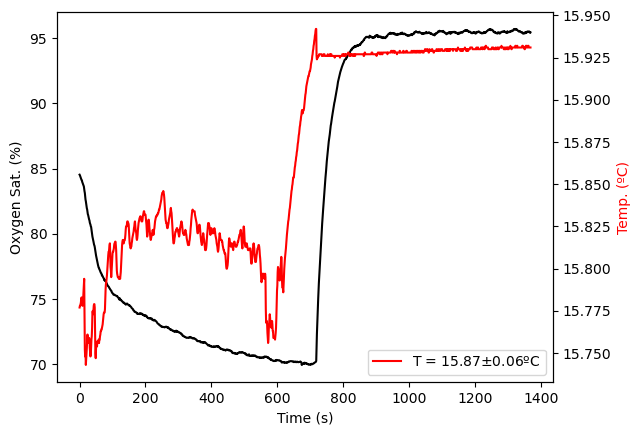

In [13]:
# Get data for one optode
time, T, raw = GetDunkData(data, optode,0)

# Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
axt = ax.twinx()
ax.plot(time, raw, 'k-')

t_label = 'T = '+str(np.round(np.nanmean(T),2))+r'$\pm$'+str(np.round(np.nanstd(T),2))+'ºC'
axt.plot(time, T, 'r-', label = t_label)
ax.set_ylabel('Oxygen Sat. (%)')
axt.set_ylabel('Temp. (ºC)', color = 'r')
ax.set_xlabel('Time (s)')
axt.legend(loc = 'lower right')

In [14]:
T = np.nanmean(T)
S = 30.52 # Salinity for test dunk
V = 13.07 # cm/s, flow speed for test dunk
# Get response time
tau = GetResponseTime(optode,T,S,V,'park','o2sat')

In [15]:
taus = np.ones(time.shape)*tau

In [16]:
corrected = ResponseTimeCorrection(time, raw, taus)

Text(0.5, 0, 'Time (s)')

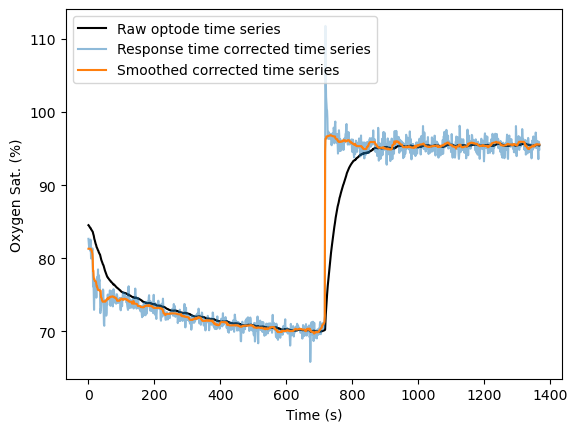

In [29]:
plt.figure()
plt.plot(time, raw, 'k-', label = 'Raw optode time series')
plt.plot(time, corrected, label = 'Response time corrected time series',
        alpha = 0.5)
plt.plot(time, median_filter(corrected, 30), label = 'Smoothed corrected time series')
plt.legend(loc = 'upper left')
plt.ylabel('Oxygen Sat. (%)')
plt.xlabel('Time (s)')